**HR Analytic for employees dataset**

**Understanding the dataset**

This dataset helps us understand why employees leave their jobs —
Is it because of low income, distance from home, job role, or education background?

Such analysis helps companies to better understand their employees and make strategies to keep them satisfied and stay longer in the organization.

**Import Necessary Libary**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
import shap

**Load the dataset**

In [51]:
df=pd.read_csv("/content/drive/MyDrive/Developer/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Data Preprocessing**

In [52]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
# Drop columns with single unique value or irrelevant for prediction
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(cols_to_drop, axis=1)

**Encode categorical variables**

In [57]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object or category type)
potential_cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply Label Encoding
le = LabelEncoder()
for col in potential_cat_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded: {col}")


Encoded: Attrition
Encoded: BusinessTravel
Encoded: Department
Encoded: EducationField
Encoded: Gender
Encoded: JobRole
Encoded: MaritalStatus
Encoded: OverTime


In [58]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [59]:
# Check class imbalance
attrition_counts = df['Attrition'].value_counts()
print("\nAttrition class distribution:")
print(attrition_counts)


Attrition class distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64


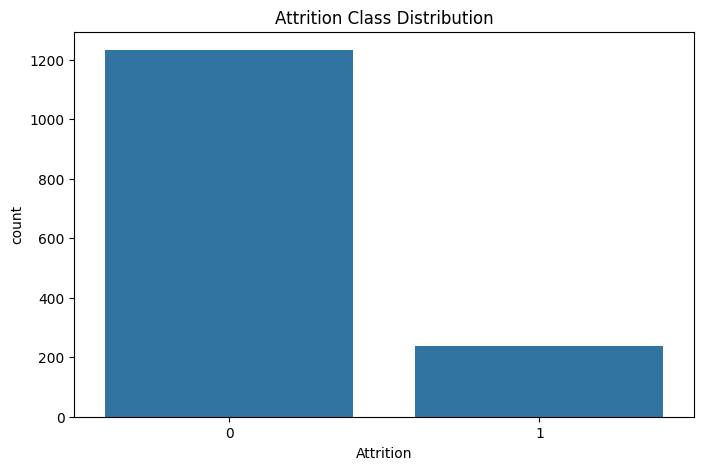

In [60]:
# Visualize class imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Class Distribution')
plt.show()

In [62]:
# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_res).value_counts())


Class distribution after SMOTE:
Attrition
1    1233
0    1233
Name: count, dtype: int64


<ipython-input-72-7a9b79ef61d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette='pastel')


Text(0, 0.5, 'Count')

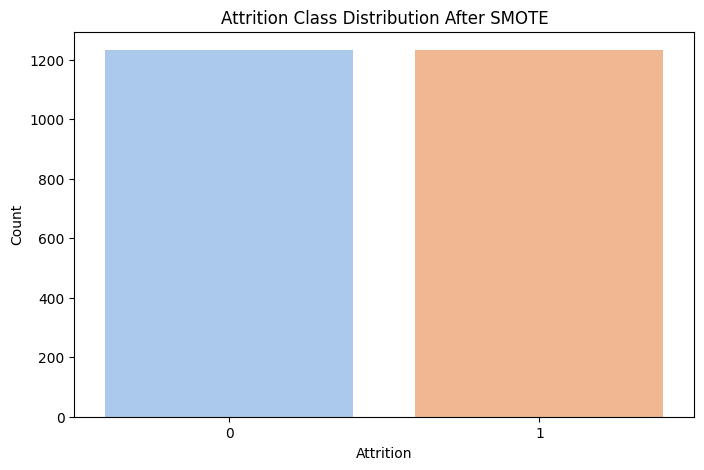

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_res, palette='pastel')
plt.title('Attrition Class Distribution After SMOTE')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Stratified train-test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,
                                                    stratify=y_res, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1726, 30)
Test set shape: (740, 30)


**Exploratory Data Analysis**

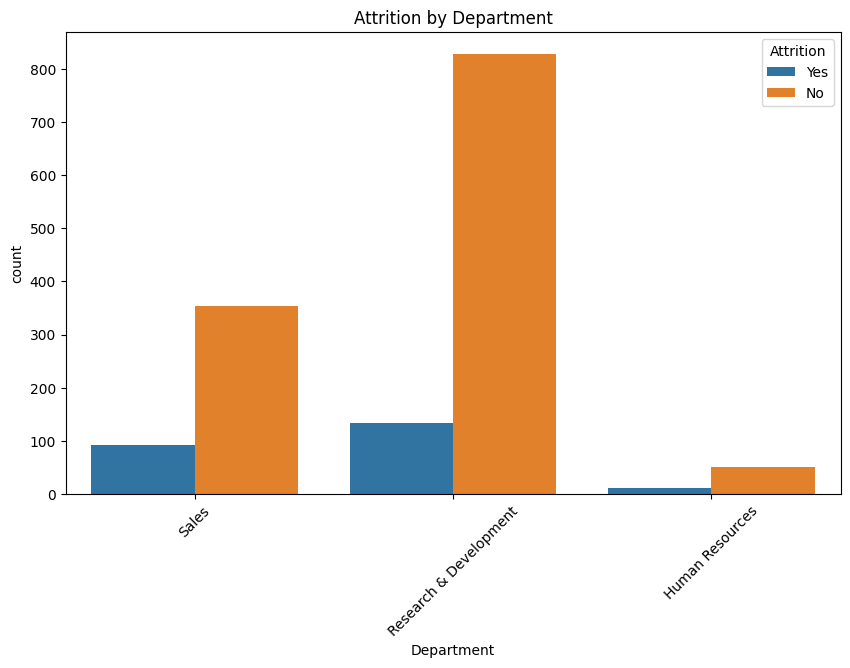

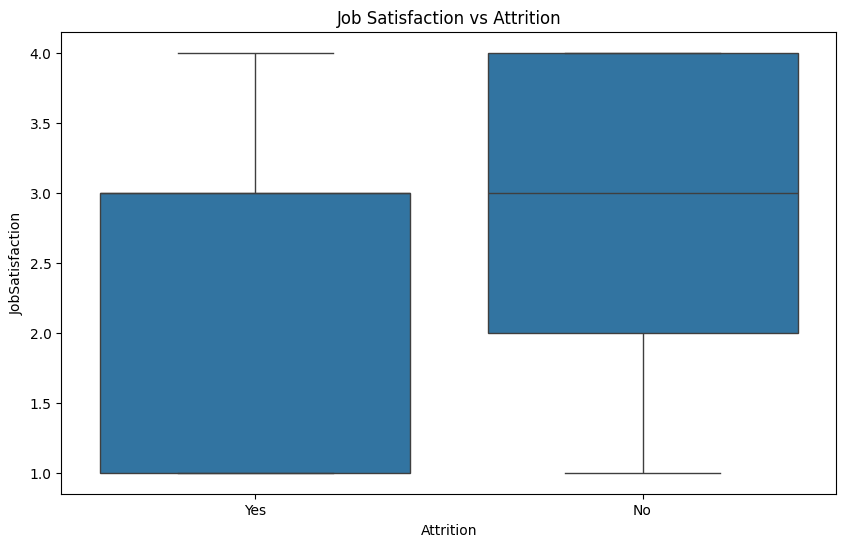

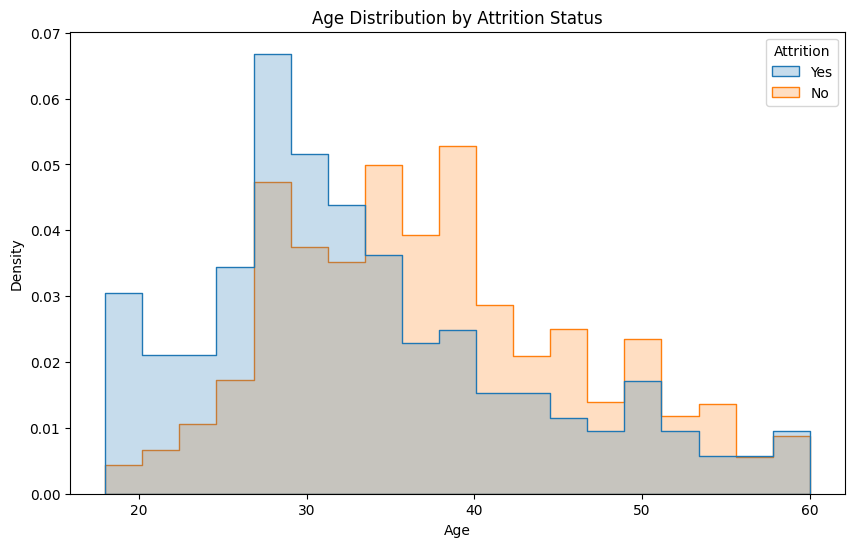

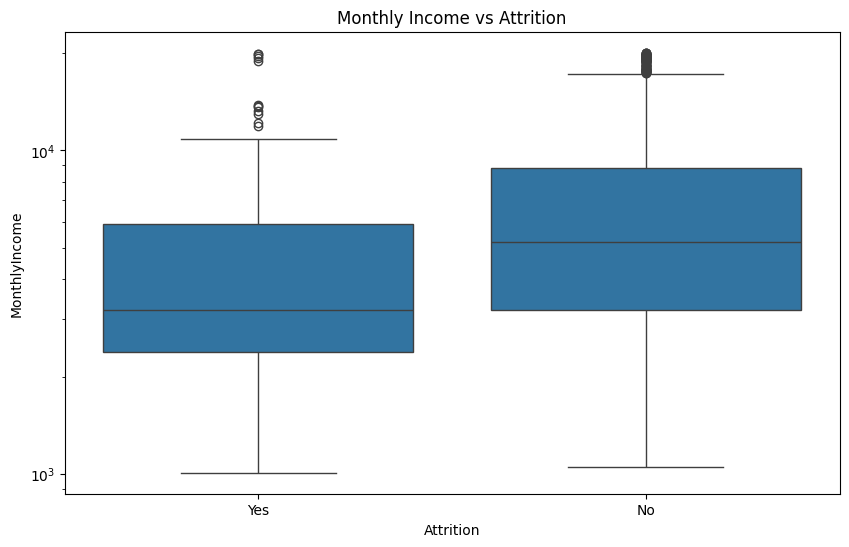

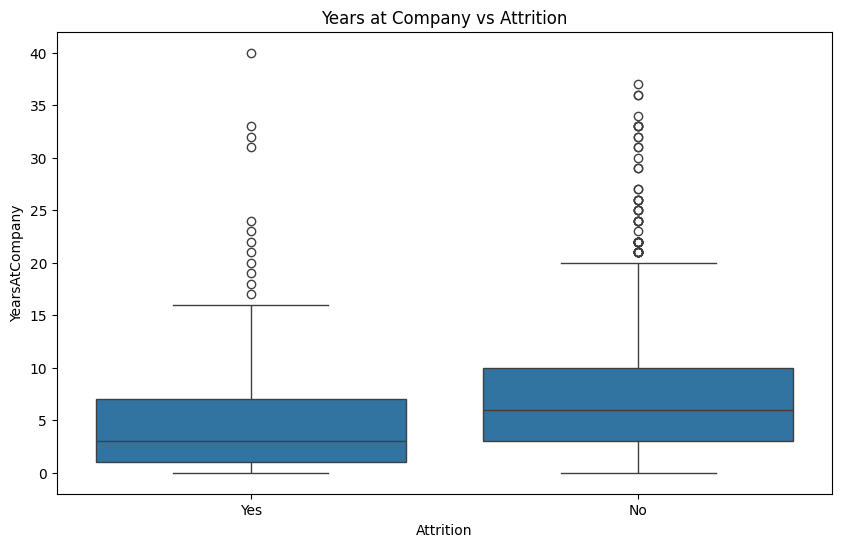

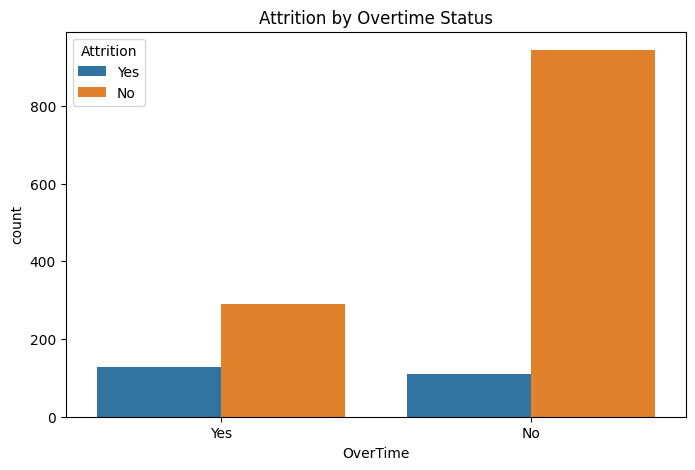

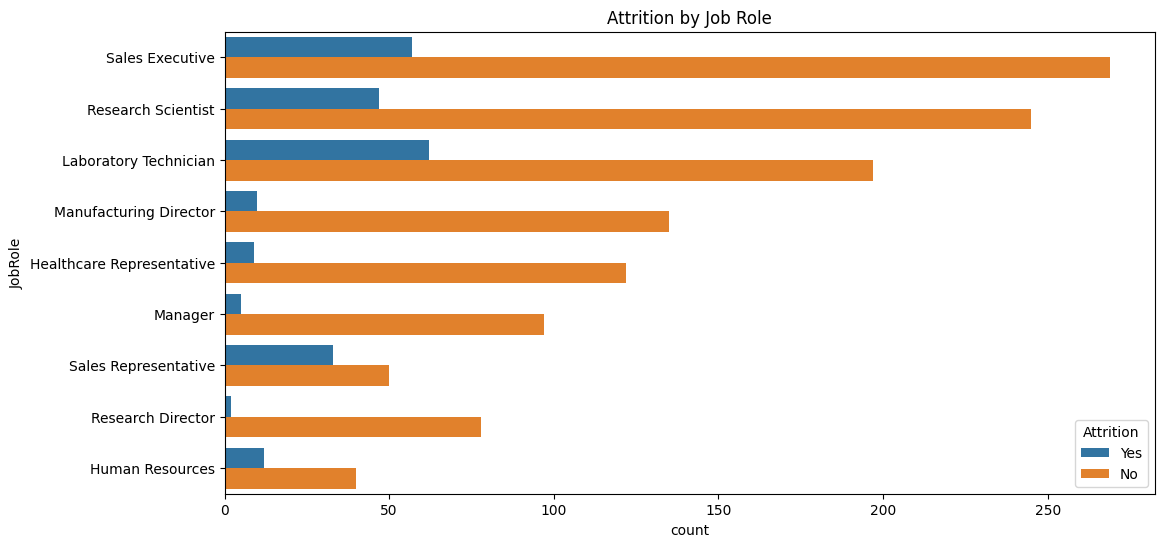

In [64]:
# Step 3: Exploratory Data Analysis (EDA) - Using original data before preprocessing
df = pd.read_csv('/content/drive/MyDrive/Developer/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Attrition by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

# Attrition by Job Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()

# Age distribution by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Attrition Status')
plt.show()

# Monthly Income vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.yscale('log')  # Using log scale due to wide income range
plt.show()

# Years at Company vs Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company vs Attrition')
plt.show()

# Overtime vs Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by Overtime Status')
plt.show()

# Job Role vs Attrition
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.show()

**Model Building**

**Train Random Forest**

A Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their outputs to improve prediction accuracy and reduce overfitting.

In [65]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Model Evalution**


Random Forest Evaluation:
Accuracy: 0.9000
Precision: 0.8936
Recall: 0.9081
F1 Score: 0.9008


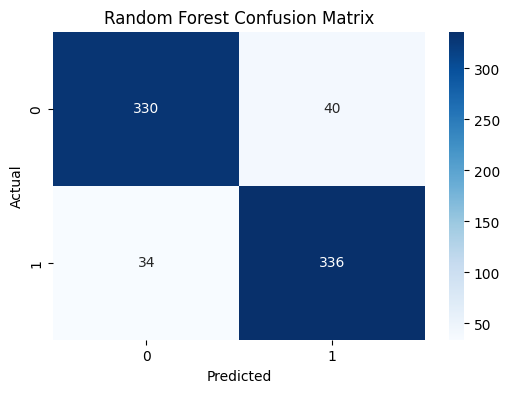

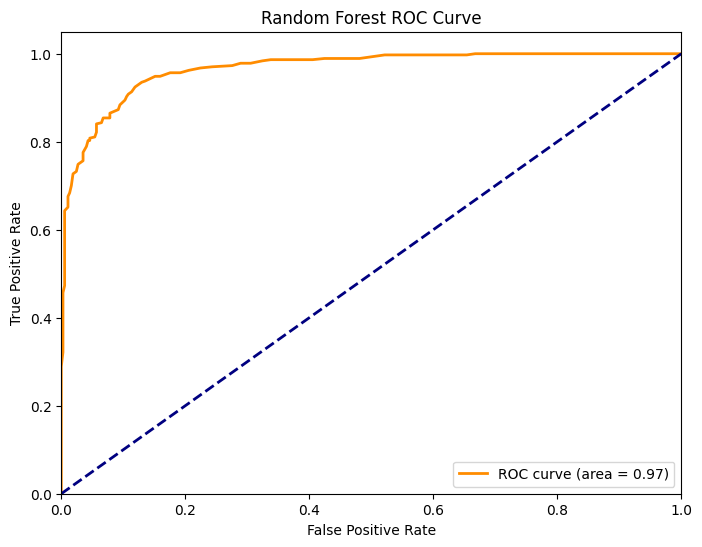


XGBoost Evaluation:
Accuracy: 0.9081
Precision: 0.9016
Recall: 0.9162
F1 Score: 0.9088


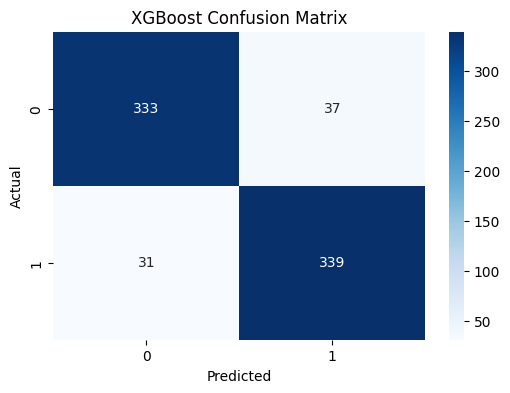

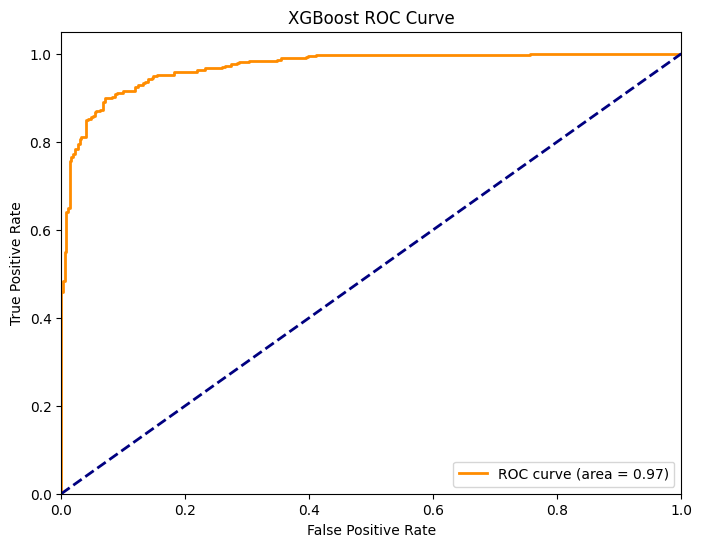

In [66]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    y_prob = rf.predict_proba(X_test)[:, 1] if model_name == 'Random Forest' else xgb.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, 'Random Forest')

# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, 'XGBoost')

<ipython-input-69-d4db939ceefa>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='red')


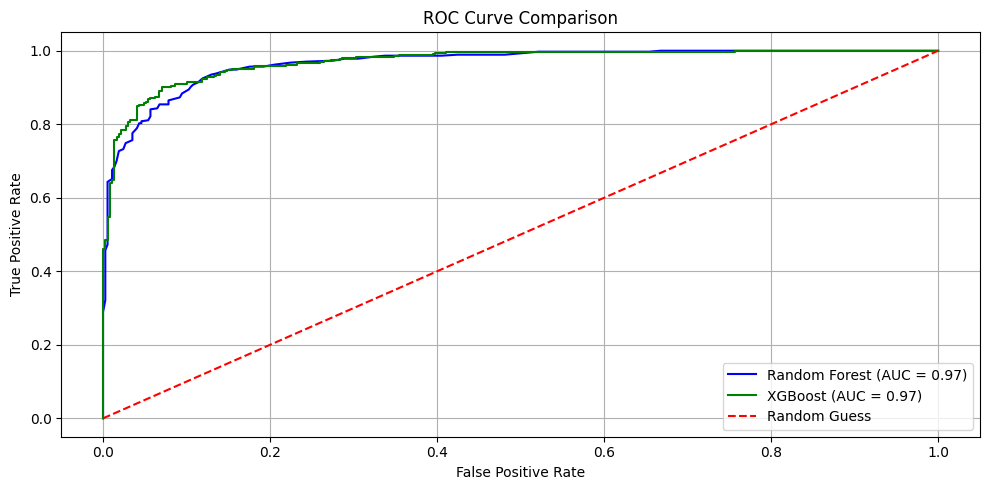

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get ROC curve values for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Get ROC curve values for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

# Plotting the ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf), color='blue')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(auc_xgb), color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


**Explainability and Feature Importance**

<ipython-input-70-b72fcf61df37>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf[indices_rf[:15]], y=features[indices_rf[:15]], palette='viridis')


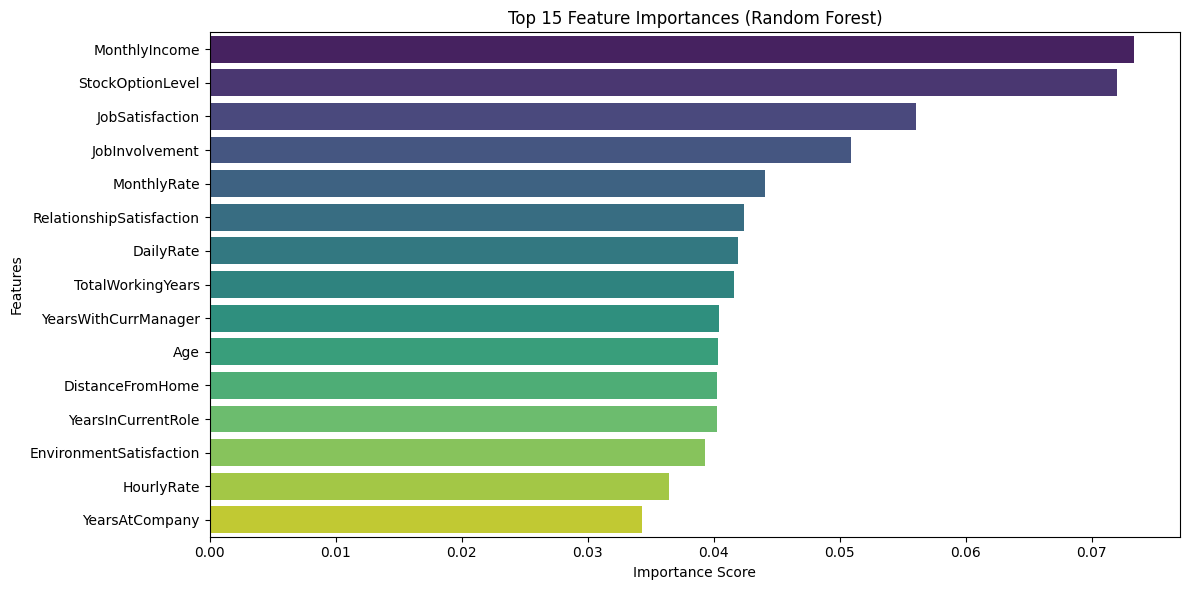

In [70]:
# Get feature importances from Random Forest
importances_rf = rf.feature_importances_
features = X.columns
indices_rf = np.argsort(importances_rf)[::-1]

# Plot top 15 important features
plt.figure(figsize=(12, 6))
sns.barplot(x=importances_rf[indices_rf[:15]], y=features[indices_rf[:15]], palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


**Business Insight**